## bla bla

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn tools
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Set seaborn style for clean visuals
sns.set(style="whitegrid")

# Load dataset
emp_data = pd.read_csv('../Data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Clean dataset (there are no duplicates or null values, so no action needed for deleting those)
print(emp_data.isnull().sum())
print(emp_data.duplicated().sum())

emp_data.columns

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
emp_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## target data types

What we want:
- DistanceFromHome
- EnvironmentSatisfaction
- JobInvolvement
- JobSatisfaction
- OverTime
- PerformanceRating
- WorkLifeBalance
- YearsAtCompany


In [ ]:
emp_data['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

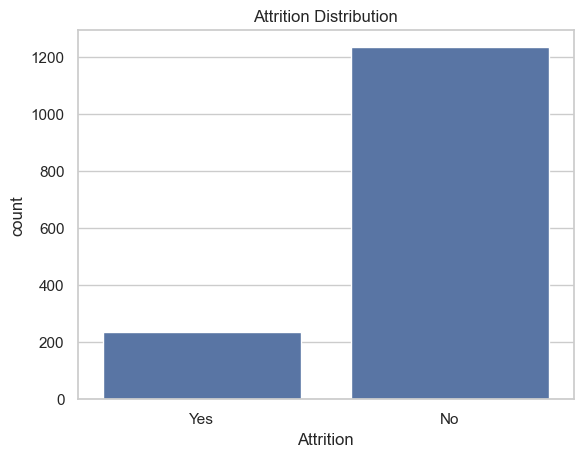

In [ ]:
sns.countplot(x='Attrition', data=emp_data)
plt.title("Attrition Distribution")
plt.show()

## Attrition

- Yes or 1 means that the employee is no longer in the company
- no or 0 means that the employee is still working

In [ ]:
emp_data['Attrition'] = emp_data['Attrition'].map({'Yes': 1, 'No': 0})

# Tjek om det virkede
emp_data['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [ ]:
features = [
    'Age',
    'DistanceFromHome',
    'EnvironmentSatisfaction',
    'JobInvolvement',
    'JobSatisfaction',
    'OverTime',
    'PerformanceRating',
    'WorkLifeBalance',
    'YearsAtCompany'
]

X = emp_data[features]
y = emp_data['Attrition']


In [ ]:
X = emp_data[features].copy()
X['OverTime'] = X['OverTime'].map({'Yes': 1, 'No': 0})


## Splitter data

In [ ]:
from sklearn.model_selection import train_test_split

# Split: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


## Desicion tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialiser og træn modellen
clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Forudsig testdata
y_pred = clf.predict(X_test)

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

# Klassifikationsrapport
print(classification_report(y_test, y_pred))

[[316  54]
 [ 52  19]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       370
           1       0.26      0.27      0.26        71

    accuracy                           0.76       441
   macro avg       0.56      0.56      0.56       441
weighted avg       0.76      0.76      0.76       441



## Check which features are relevent

- Score	    Fortolkning
- ">" 20	Stærkt signal
- 5 – 20	Nogen værdi
- < 2	    Svagt/irrelevant

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train, y_train)

# Se hvilke features der scorer højt
feature_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print(feature_scores)



                   Feature      Score
5                 OverTime  50.410797
0                      Age  36.101857
8           YearsAtCompany  27.387766
3           JobInvolvement  16.211014
2  EnvironmentSatisfaction  12.639591
4          JobSatisfaction  11.559622
7          WorkLifeBalance   6.933123
1         DistanceFromHome   6.164756
6        PerformanceRating   0.006717


In [ ]:
selected_features = [
    'OverTime',
    'Age',
    'YearsInCurrentRole',
    'YearsAtCompany',
    'JobInvolvement',
    'EnvironmentSatisfaction',
    'JobSatisfaction',
    'WorkLifeBalance',
]

In [ ]:
X = emp_data[selected_features]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Target variabel – konverter til 0/1 hvis ikke allerede gjort
emp_data['Attrition'] = emp_data['Attrition'].replace({'No': 0, 'Yes': 1})

# Features og target
X = emp_data[selected_features]
y = emp_data['Attrition']

# One-hot encode OverTime (hvis den er kategorisk)
X = pd.get_dummies(X, drop_first=True)



In [ ]:
print(emp_data['Attrition'].unique())


[1 0]


In [ ]:
# 1. Rens og map target
emp_data = emp_data.dropna(subset=['Attrition'])
emp_data['Attrition'] = emp_data['Attrition'].replace({'No': 0, 'Yes': 1})

# 2. Features og target
X = emp_data[selected_features]
X = pd.get_dummies(X, drop_first=True)
y = emp_data['Attrition']  # <- Her! opdater efter mappet

# 3. Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [ ]:
print(emp_data['Attrition'].unique())


[1 0]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Initialiser og træn Decision Tree
clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

# Forudsig test-data
y_pred = clf.predict(X_test)

# Evaluer resultater
print("🔍 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📊 Klassifikationsrapport:")
print(classification_report(y_test, y_pred))


🔍 Confusion Matrix:
[[319  51]
 [ 47  24]]

📊 Klassifikationsrapport:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       370
           1       0.32      0.34      0.33        71

    accuracy                           0.78       441
   macro avg       0.60      0.60      0.60       441
weighted avg       0.78      0.78      0.78       441

